In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
%matplotlib inline

(44,)
0.0 0.0 0 max (min abs)
2.45283528 0.0 33 min (max abs)
0.0 0.0 0 max (min abs)
3.14159265 1.67578116 30 min (max abs)
0.0 0.0 0 max (min abs)
3.14159265 3.14159265 43 min (max abs)
0.0 0.0 0 max (min abs)
3.14159265 3.14159265 43 min (max abs)
0.0 0.0 0 max (min abs)
3.14159265 3.14159265 43 min (max abs)
0.0 0.0 0 max (min abs)
3.14159265 3.14159265 43 min (max abs)
0.0 0.0 0 max (min abs)
3.14159265 3.14159265 43 min (max abs)
0.0 0.0 0 max (min abs)
3.14159265 3.14159265 43 min (max abs)
0.0 0.0 0 max (min abs)
3.14159265 3.14159265 43 min (max abs)
0.0 0.0 0 max (min abs)
3.14159265 3.14159265 43 min (max abs)
0.0 0.0 0 max (min abs)
3.14159265 3.14159265 43 min (max abs)
0.0 0.0 0 max (min abs)
3.14159265 3.14159265 43 min (max abs)


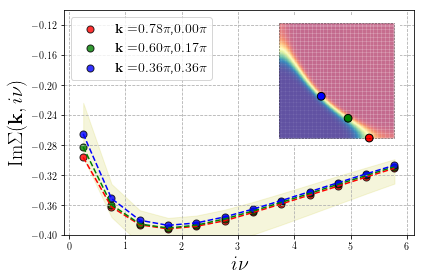

In [14]:
def subFermi (namefile, ax,  title=None, xtw =True , ytw =True, bar = False   ):    
    cmap = 'jet'
 # Choose colormap
    smap = plt.cm.Spectral
    # Get the colormap colors
    my_cmap = smap(np.arange(smap.N))
    my_cmap[:,-1] = np.linspace(0.05, 0.2, smap.N)
    my_cmap = ListedColormap(my_cmap)
    
    matriciona = np.loadtxt(namefile, comments ='#')
   
    im= ax.pcolormesh ( np.arange(0.,np.pi,np.pi/matriciona.shape[0]),np.arange(0.,np.pi,np.pi/matriciona.shape[0]),matriciona,cmap=my_cmap)     
    ax.set_aspect(1) 
# Self energy data
self = np.transpose(np.loadtxt('../data/Self_energy_fill_0.600_Im.txt'))
T = 0.08
# Patch data
kx, ky = np.loadtxt('../data/Self_energy_fill_0.600_patch.txt',usecols=(0,1),unpack=True)
print  kx.shape

FSstart   = np.shape(kx)[0]-10-1
FSend     = np.shape(kx)[0]-1

imax      = np.unravel_index(np.argmin( self ), self.shape)[0] 
imin      = np.argmin([np.max(np.abs(self[i,:])) for i in range (self.shape[0])])
ikplt     =  [          FSstart        , FSstart + 5 ,       FSend-1        ]
col       =  [           'r'           , 'g',         'b'            ]
wmax=12
w = np.array(range(wmax))
om = np.pi*(2.*w[:]+1.)*T

kmax=np.array([np.argmax(self[:,iw]) for iw in w])
kmin=np.array([np.argmin(self[:,iw]) for iw in w])

for i in range(len(kmax)):
    print kx[kmax[i]],ky[kmax[i]],kmax[i] ,"max (min abs)"
    print kx[kmin[i]],ky[kmin[i]],kmin[i] ,"min (max abs)"


se_max = np.array( [ np.max(self[:,iw]) for iw in w ] )
se_min = np.array( [ np.min(self[:,iw]) for iw in w ] )

plt.fill_between( om, se_min, se_max , color='y', alpha=0.14)

for ik, i in zip(ikplt,range(len(ikplt))):
    se_plt = self[ik,:w[-1]+1]
    lab =r"$\mathbf{k} =$"+ r"${:.2f}$".format(kx[ik]/np.pi)+r"$\pi$,"+r"${:.2f}$".format(ky[ik]/np.pi)+r"$\pi$"
    plt.plot( om, se_plt , color=col[i],linestyle='dashed')
    plt.scatter( om, se_plt ,marker = 'o', edgecolor='black', label=lab ,alpha=0.8, s=50.0,color = col[i]) 
plt.gca().set_yticks(np.arange(0.,-0.5,-0.04))
plt.gca().set_xlabel(r'$i\nu$', fontsize = 20)
plt.gca().set_ylabel(r'$\mathrm{Im}\Sigma(\mathbf{k},i\nu)$', fontsize = 20)
plt.ylim([-0.4,-0.1])
plt.grid(linestyle='dashed')
plt.legend(loc=2,fontsize=14)

# Inset
psize = 50.0
ax = plt.axes([0.57, 0.48, .45, .45])
subFermi('../data/Fermi_occupation_NOSE_fill0_600.txt',ax)
color = ['none' for i in range(kx.shape[0])]
size  = [10.0 for i in range(kx.shape[0])]

ax.scatter(kx[ikplt],ky[ikplt],marker='o', edgecolor ='black',s=60,c=['red','green','blue'])

ax.set_xticks([])
ax.set_yticks([])
ax.plot([0.,0.],[np.pi,0.],linestyle='dashed', linewidth = 0.6, color = 'black', alpha = 0.6)
ax.plot([0,np.pi],[np.pi,np.pi],linestyle='dashed', linewidth = 0.6, color = 'black', alpha = 0.6)
ax.plot([np.pi,np.pi],[0.,np.pi],linestyle='dashed', linewidth = 0.6, color = 'black', alpha = 0.6)
ax.plot([0.0,np.pi],[0.0,0.0],linestyle='dashed', linewidth = 0.6, color = 'black', alpha = 0.6)    
ax.set_ylim(-0.2,np.pi+0.2)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_aspect(1)

plt.savefig('../images/juppy/Self_Im_occ0600.png',dpi=300)

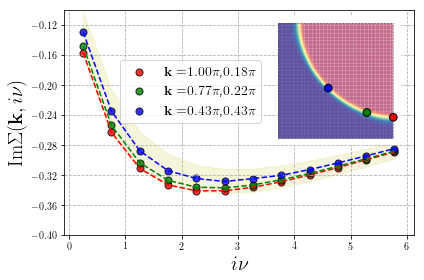

In [14]:
def subFermi (namefile, ax,  title=None, xtw =True , ytw =True, bar = False   ):    
    cmap = 'jet'
 # Choose colormap
    smap = plt.cm.Spectral
    # Get the colormap colors
    my_cmap = smap(np.arange(smap.N))
    my_cmap[:,-1] = np.linspace(0.05, 0.2, smap.N)
    my_cmap = ListedColormap(my_cmap)
    
    matriciona = np.loadtxt(namefile, comments ='#')
   
    im= ax.pcolormesh ( np.arange(0.,np.pi,np.pi/matriciona.shape[0]),np.arange(0.,np.pi,np.pi/matriciona.shape[0]),matriciona,cmap=my_cmap)     
    ax.set_aspect(1) 

# Self energy data
self = np.transpose(np.loadtxt('../data/Self_energy_fill_0.975_Im.txt'))
T = 0.08

# Patch data
kx, ky = np.loadtxt('../data/Self_energy_fill_0.975_patch.txt',usecols=(0,1),unpack=True)

FSstart   = np.shape(kx)[0]-10-1
FSend     = np.shape(kx)[0]-1

imax      = np.unravel_index(np.argmin( self ), self.shape)[0] 
imin      = np.argmin([np.max(np.abs(self[i,:])) for i in range (self.shape[0])])
ikplt     =  [          FSstart        , FSstart + 5 ,       FSend-1        ]
col       =  [           'r'           , 'g',         'b'            ]
wmax=12
w = np.array(range(wmax))
om = np.pi*(2.*w[:]+1.)*T

se_max = np.array( [ np.max(self[:,iw]) for iw in w ] )
se_min = np.array( [ np.min(self[:,iw]) for iw in w ] )
#plt.fill_between( om, self[imax,:w[-1]+1], self[imin,:w[-1]+1] , color='y')
plt.fill_between( om, se_min, se_max , color='y', alpha=0.14)


for ik, i in zip(ikplt,range(len(ikplt))):
    se_plt = self[ik,:w[-1]+1]
    lab =r"$\mathbf{k} =$"+ r"${:.2f}$".format(kx[ik]/np.pi)+r"$\pi$,"+r"${:.2f}$".format(ky[ik]/np.pi)+r"$\pi$"
    plt.plot( om, se_plt , color=col[i],linestyle='dashed')
    plt.scatter( om, se_plt ,marker = 'o',edgecolor='black',  label=lab ,alpha=0.8, s=50.0,color = col[i]) 
plt.gca().set_yticks(np.arange(0.,-0.5,-0.04))
plt.gca().set_xlabel(r'$i\nu$', fontsize = 20)
plt.gca().set_ylabel(r'$\mathrm{Im}\Sigma(\mathbf{k},i\nu)$', fontsize = 20)
#plt.ylim([-0.36,-0.10])
plt.ylim([-0.40,-0.1])
plt.grid(linestyle='dashed')
plt.legend(loc=(0.16,0.5), fontsize=14)

# Inset
psize = 50.0
ax = plt.axes([0.57, 0.48, .45, .45])
subFermi('../data/Fermi_occupation_NOSE_fill0_975.txt',ax)
color = ['none' for i in range(kx.shape[0])]
size  = [10.0 for i in range(kx.shape[0])]

ax.scatter(kx[ikplt],ky[ikplt],marker='o',edgecolor='black', s=60,c=['red','green','blue'])
ax.set_xticks([])
ax.set_yticks([])
ax.plot([0.,0.],[np.pi,0.],linestyle='dashed', linewidth = 0.6, color = 'black', alpha = 0.6)
ax.plot([0,np.pi],[np.pi,np.pi],linestyle='dashed', linewidth = 0.6, color = 'black', alpha = 0.6)
ax.plot([np.pi,np.pi],[0.,np.pi],linestyle='dashed', linewidth = 0.6, color = 'black', alpha = 0.6)
ax.plot([0.0,np.pi],[0.0,0.0],linestyle='dashed', linewidth = 0.6, color = 'black', alpha = 0.6)    
ax.set_ylim(-0.2,np.pi+0.2)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_aspect(1)

plt.savefig('../images/juppy/Self_Im_occ0975.png',dpi=300)